<a href="https://colab.research.google.com/github/zaegeon/Project/blob/main/0722_APPLE_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls -la "/content/gdrive/MyDrive/ColabNotebooks/darknet"

total 36
drwx------ 3 root root 4096 Jul 22 03:39 apple_img
drwx------ 2 root root 4096 Jul 22 08:10 backup
drwx------ 2 root root 4096 Jul 21 00:55 bin
drwx------ 2 root root 4096 Jul 21 00:50 cfg
drwx------ 2 root root 4096 Jul 21 00:47 cuDNN
drwx------ 2 root root 4096 Jul 22 06:31 custom
drwx------ 3 root root 4096 Jul 21 00:48 data
drwx------ 2 root root 4096 Jul 21 04:39 .ipynb_checkpoints
drwx------ 2 root root 4096 Jul 21 00:51 weights


#2. Install CUDA related module, cuDNN 

In [ ]:
!tar -xzvf /content/gdrive/MyDrive/ColabNotebooks/darknet/cuDNN/cudnn-11.1-linux-x64-v8.0.4.30.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

!cat /usr/local/cuda/include/cudnn_version.h | grep CUDNN_MAJOR -A 2 # check version

cuda/include/cudnn.h
cuda/include/cudnn_adv_infer.h
cuda/include/cudnn_adv_train.h
cuda/include/cudnn_backend.h
cuda/include/cudnn_cnn_infer.h
cuda/include/cudnn_cnn_train.h
cuda/include/cudnn_ops_infer.h
cuda/include/cudnn_ops_train.h
cuda/include/cudnn_version.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.8
cuda/lib64/libcudnn.so.8.0.4
cuda/lib64/libcudnn_adv_infer.so
cuda/lib64/libcudnn_adv_infer.so.8
cuda/lib64/libcudnn_adv_infer.so.8.0.4
cuda/lib64/libcudnn_adv_train.so
cuda/lib64/libcudnn_adv_train.so.8
cuda/lib64/libcudnn_adv_train.so.8.0.4
cuda/lib64/libcudnn_cnn_infer.so
cuda/lib64/libcudnn_cnn_infer.so.8
cuda/lib64/libcudnn_cnn_infer.so.8.0.4
cuda/lib64/libcudnn_cnn_train.so
cuda/lib64/libcudnn_cnn_train.so.8
cuda/lib64/libcudnn_cnn_train.so.8.0.4
cuda/lib64/libcudnn_ops_infer.so
cuda/lib64/libcudnn_ops_infer.so.8
cuda/lib64/libcudnn_ops_infer.so.8.0.4
cuda/lib64/libcudnn_ops_train.so
cuda/lib64/libcudnn_ops_train.so.8
cuda/lib64/libcudnn_o

In [ ]:
!ls -la /usr/local/cuda/include/cudnn.h # cuda install check

-rw-rw-r-- 1 root root 2968 Sep 23  2020 /usr/local/cuda/include/cudnn.h


#3. Load DarkNet

In [ ]:
# Google Colab에 작업 파일(darknet) 생성
import os
if not os.path.exists('darknet'):
    os.makedirs('darknet')
%cd darknet
%ls

/content/darknet


In [ ]:
# Google Drive에 있는 darknet 작업 환경을 Google Colab으로 복사
!ls -la '/content/gdrive/MyDrive/ColabNotebooks/darknet/bin/darknet'

!cp /content/gdrive/MyDrive/ColabNotebooks/darknet/bin/darknet ./darknet

!chmod +x ./darknet

-rw------- 1 root root 6845696 Jul 21 00:55 /content/gdrive/MyDrive/ColabNotebooks/darknet/bin/darknet


#4. Test YOLO

In [ ]:
# 파일 참조 준비
!cp -r '/content/gdrive/MyDrive/ColabNotebooks/darknet/weights' .
!cp -r '/content/gdrive/MyDrive/ColabNotebooks/darknet/cfg' .
!cp -r '/content/gdrive/MyDrive/ColabNotebooks/darknet/data' .
!cp -r '/content/gdrive/MyDrive/ColabNotebooks/darknet/apple_img' .
%ls

apple_img/  cfg/  darknet*  data/  weights/


In [ ]:
# Imports
import cv2
import matplotlib.pyplot as plt

In [ ]:
# Download Files
def imShow(path):
    %matplotlib inline

    img = cv2.imread(path)
    height, width = img.shape[:2]
    resized_img = cv2.resize(img, (3 * width, 3 * height), interpolation = cv2.INTER_CUBIC)

    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.axis('off')
    #plt.rcParams['figure.figsize'] = [10, 5]
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    plt.show()

def upload():
    from google.colab import files
    uploaded = file.upload()
    for name, data in upload.items():
        with open(name, 'wb') as f:
            f.write(data)
            print('saved file', name)

def download(path):
    from google.colab import files
    files.download(path)

 CUDA-version: 11010 (11020), cuDNN: 8.0.4, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.40

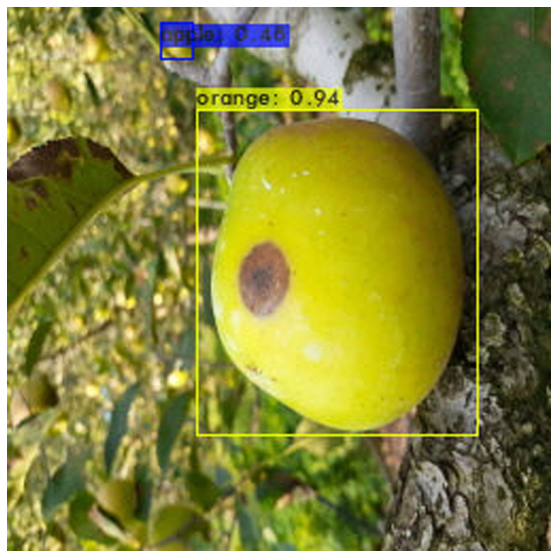

In [ ]:
# 기존 yolo data → apple image detect
!./darknet detect cfg/yolov3.cfg weights/yolov3.weights apple_img/apple_1_215.jpg
imShow('predictions.jpg')

#5. Custom YOLO

## 훈련에 사용할 train/test.txt 생성

In [ ]:
# 저장 형식 exercise
path = '/content/gdrive/MyDrive/ColabNotebooks/darknet/apple_img/'
print(path + 'apple_0_' + format(50, '03') + '.jpg')

/content/gdrive/MyDrive/ColabNotebooks/darknet/apple_img/apple_0_050.jpg


### 저장된 txt 파일을 사용할거면 아래 생략

In [ ]:
# train/test number 지정
import numpy as np
import random as rd

all_num = list(np.arange(1, 501))
train_num = rd.sample(all_num, int(len(all_num) * 0.8))
test_num = list(set(all_num).difference(train_num))
print(train_num)
print(len(train_num))
print(test_num)
print(len(test_num))

[160, 21, 419, 134, 120, 360, 55, 382, 75, 69, 326, 141, 385, 308, 167, 393, 423, 188, 371, 151, 377, 8, 311, 147, 238, 384, 461, 492, 234, 294, 258, 351, 403, 242, 256, 430, 14, 332, 9, 259, 386, 284, 446, 34, 51, 306, 148, 112, 81, 279, 354, 107, 25, 219, 217, 497, 452, 139, 183, 355, 209, 119, 457, 142, 187, 261, 129, 344, 108, 289, 490, 477, 124, 436, 466, 30, 317, 478, 390, 198, 375, 109, 346, 413, 445, 226, 213, 45, 54, 123, 164, 70, 345, 264, 348, 409, 391, 83, 335, 462, 252, 310, 299, 105, 59, 235, 85, 163, 456, 396, 93, 52, 387, 395, 495, 378, 297, 158, 103, 4, 220, 464, 102, 307, 174, 12, 13, 94, 42, 19, 421, 480, 236, 338, 165, 273, 465, 125, 341, 190, 274, 11, 454, 97, 76, 316, 296, 137, 248, 476, 91, 453, 266, 227, 95, 334, 193, 460, 265, 38, 432, 57, 245, 159, 46, 176, 280, 441, 207, 434, 116, 328, 225, 275, 162, 327, 111, 304, 496, 267, 82, 337, 415, 179, 368, 276, 414, 173, 358, 407, 437, 283, 361, 408, 485, 463, 130, 84, 369, 68, 482, 469, 201, 74, 282, 63, 406, 35, 13

In [ ]:
os.chdir("/content/gdrive/MyDrive/ColabNotebooks/darknet/custom") # 기존 train.txt 삭제 후 진행!
# os.getcwd()
f = open('train.txt', 'w')
for i in range(0,2):    
    for n in train_num:
        data = path + 'apple_' + str(i) +'_' + format(n, '03') + '.jpg\n'
        f.write(data)
f.close()

In [ ]:
os.chdir("/content/gdrive/MyDrive/ColabNotebooks/darknet/custom") # 기존 train.txt 삭제 후 진행!
# os.getcwd()
f = open('test.txt', 'w')
for i in range(0,2):    
    for n in test_num:
        data = path + 'apple_' + str(i) +'_' + format(n, '03') + '.jpg\n'
        f.write(data)
f.close()

## Train

In [ ]:
# 파일 경로 변경(darknet)
%cd /content/darknet

/content/darknet


In [ ]:
# 파일 복사
!cp -r "/content/gdrive/MyDrive/ColabNotebooks/darknet/custom" .

**train 전에 darknet 하위에 백업 폴더 생성**

### Max_batches = 200

max_batches = 200으로 코드 실행 잘 되는지 우선 확인

In [ ]:
#!./darknet detector train custom/custom_data.data custom/custom-train-yolo-maxbatches200.cfg\
#    weights/darknet53.conv.74 -dont_show

In [ ]:
# mAP(mean average precision)
#!./darknet detector map custom/custom_data.data custom/custom-train-yolo-maxbatches200.cfg\
#    backup/custom-train-yolo-maxbatches200_final.weights

In [ ]:
# 백업 파일 복사
if os.path.exists('./backup'):
    !cp -r ./backup '/content/gdrive/MyDrive/ColabNotebooks/darknet'

if not os.path.exists('./backup'):
    os.makedirs('./backup')
    !cp -r '/content/gdrive/MyDrive/ColabNotebooks/darknet/backup/custom-train-yolo-maxbatches200_final.weights'

cp: missing destination file operand after '/content/gdrive/MyDrive/ColabNotebooks/darknet/backup/custom-train-yolo-maxbatches200_final.weights'
Try 'cp --help' for more information.


 CUDA-version: 11010 (11020), cuDNN: 8.0.4, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Couldn't open file: custom/custom-train-yolo-maxbatches200.cfg


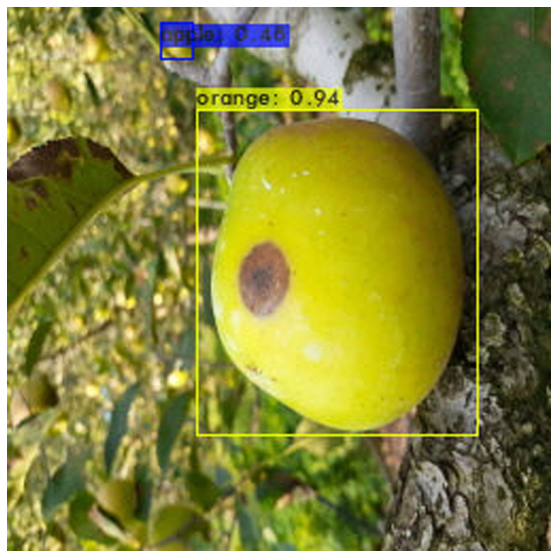

In [ ]:
!./darknet detector test custom/custom_data.data custom/custom-train-yolo-maxbatches200.cfg \
  backup/custom-train-yolo-maxbatches200_final.weights apple_img/apple_0_004.jpg -dont_show

imShow('predictions.jpg')

### Max_batches = 4000

4000 batches (될까..?)

### --- train (Long Time) ---

In [ ]:
!./darknet detector train custom/custom_data.data custom/custom-train-yolo.cfg\
    weights/darknet53.conv.74 -dont_show

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 124961, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.941000), count: 2, class_loss = 0.000149, iou_loss = 0.015996, total_loss = 0.016146 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 124963, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normal

In [ ]:
# 백업 파일 복사
if os.path.exists('./backup'):
    !cp -r ./backup '/content/gdrive/MyDrive/ColabNotebooks/darknet'

if not os.path.exists('./backup'):
    os.makedirs('./backup')
    !cp -r '/content/gdrive/MyDrive/ColabNotebooks/darknet/backup/custom-train-yolo.weights'

### Test

 CUDA-version: 11010 (11020), cuDNN: 8.0.4, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    256 x 256 x   3 ->  256 x 256 x  32 0.113 BF
   1 conv     64       3 x 3/ 2    256 x 256 x  32 ->  128 x 128 x  64 0.604 BF
   2 conv     32       1 x 1/ 1    128 x 128 x  64 ->  128 x 128 x  32 0.067 BF
   3 conv     64       3 x 3/ 1    128 x 128 x  32 ->  128 x 128 x  64 0.604 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 128 x 128 x  64 0.001 BF
   5 conv    128       3 x 3/ 2    128 x 128 x  64 ->   64 x  64 x 128 0.604 BF
   6 conv     64       1 x 1/ 1     64 x  64 x 128 ->   64 x  64 x  64 0.067 BF
   7 conv    128       3 x 3/ 1     64 x  64 x  64 ->   64 x  64 x 128 0.60

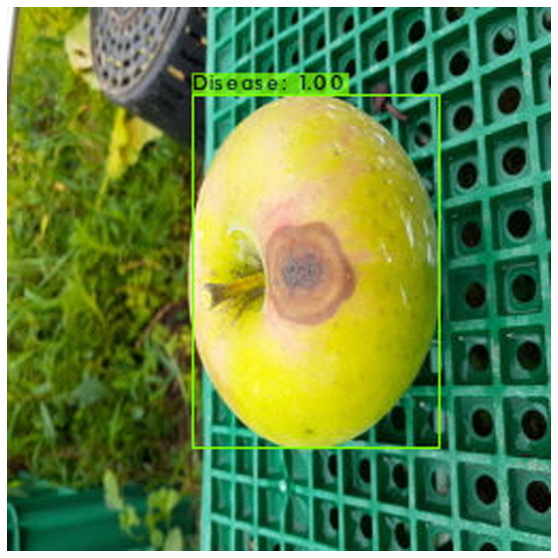

In [ ]:
!./darknet detector test custom/custom_data.data custom/custom-train-yolo.cfg \
  backup/custom-train-yolo_final.weights apple_img/apple_1_161.jpg -dont_show

imShow('predictions.jpg')

### Apply to other photo

In [ ]:
# 경로 이동
%cd /content/gdrive/MyDrive/ColabNotebooks/darknet/apple_img/apple_val

/content/gdrive/MyDrive/ColabNotebooks/darknet/apple_img/apple_val


In [ ]:
# 파일 복사
!cp -r "/content/gdrive/MyDrive/ColabNotebooks/darknet/apple_img/apple_val" /content/darknet/apple_img/apple_val

In [ ]:
# darknet으로 경로 이동
% cd /content/darknet

/content/darknet


 CUDA-version: 11010 (11020), cuDNN: 8.0.4, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    256 x 256 x   3 ->  256 x 256 x  32 0.113 BF
   1 conv     64       3 x 3/ 2    256 x 256 x  32 ->  128 x 128 x  64 0.604 BF
   2 conv     32       1 x 1/ 1    128 x 128 x  64 ->  128 x 128 x  32 0.067 BF
   3 conv     64       3 x 3/ 1    128 x 128 x  32 ->  128 x 128 x  64 0.604 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 128 x 128 x  64 0.001 BF
   5 conv    128       3 x 3/ 2    128 x 128 x  64 ->   64 x  64 x 128 0.604 BF
   6 conv     64       1 x 1/ 1     64 x  64 x 128 ->   64 x  64 x  64 0.067 BF
   7 conv    128       3 x 3/ 1     64 x  64 x  64 ->   64 x  64 x 128 0.60

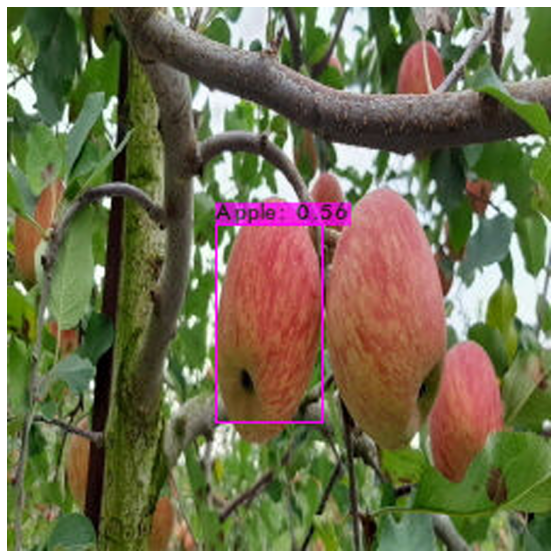

In [ ]:
!./darknet detector test custom/custom_data.data custom/custom-train-yolo.cfg \
  backup/custom-train-yolo_final.weights apple_img/apple_val/apple_val_0_100.jpg -dont_show

imShow('predictions.jpg')